**Step by step**

1. Sélection et la division des caractéristiques

    Choix des caractéristiques
    
    Normalisation des caractéristiques

2. Construction du modèle

    choix des modèles de prédiction 
    
3. Entraînement du modèle

    Entraînement : Entraîner le modèle sur less données IMDB.
    
4. Optimisation du modèle 

    Choix des techniques telles que la validation croisée et Grid Search pour optimiser les hyperparamètres du modèle
    
5. Evaluation du modèle
    
    Évaluation : Évaluer la performance du modèle à l'aide de métriques telles que le RMSE, MSE et R2
        
        MSE (Mean Squared Error) : C'est la moyenne des carrés des écarts entre les valeurs prédites par le modèle et les valeurs réelles
        
        RMSE (Root Mean Squared Error) : C'est la racine carrée du MSE. Cela donne une idée de la quantité d'erreur dans le modèle. 
        Plus le RMSE est bas, plus les prédictions sont précises
        
        R² (R-squared ou coefficient de détermination) : C'est une mesure de la qualité de l'ajustement du modèle à la variabilité des données 


In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from joblib import dump, load

In [47]:
# URL fournie
dataset_url = "https://raw.githubusercontent.com/AntoanetaStoyanova/PROJECT-IMBD/main/Datas/5000_movie_correction.csv"

# Chargement des données
df = pd.read_csv(dataset_url)
df.head(5)

,color,director_name,num_critic_for_reviews,duration,director_fb_likes,actor_3_fb_likes,actor_2_name,actor_1_fb_likes,gross,genres,...,Musical,Mystery,News,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,0,0,0,0,1,0,0,0,0,0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,0,0,0,0,0,0,0,0,0,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,0,0,0,0,0,0,0,1,0,0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,0,0,0,0,0,0,0,1,0,0
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,0,0,0,0,1,0,0,0,0,0


In [48]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4768 entries, 0 to 4767
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   color                   4768 non-null   object 
 1   director_name           4768 non-null   object 
 2   num_critic_for_reviews  4768 non-null   float64
 3   duration                4768 non-null   float64
 4   director_fb_likes       4768 non-null   float64
 5   actor_3_fb_likes        4758 non-null   float64
 6   actor_2_name            4768 non-null   object 
 7   actor_1_fb_likes        4768 non-null   float64
 8   gross                   4768 non-null   float64
 9   genres                  4768 non-null   object 
 10  actor_1_name            4768 non-null   object 
 11  movie_title             4768 non-null   object 
 12  num_voted_users         4768 non-null   int64  
 13  cast_total_fb_likes     4768 non-null   int64  
 14  actor_3_name            4768 non-null   

****Selection de la cible****

In [49]:
# Sélection des caractéristiques et de la cible
features = ['num_critic_for_reviews', 'duration', 'actor_1_fb_likes', 'gross', 'num_voted_users', 'facenumber_in_poster', 'num_user_for_reviews', 'budget', 'title_year',
            'Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
            'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western']
target = 'imdb_score'  


****Division des données****

In [50]:
# Division des données
X = df[features]
y =df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


****Normalisation des caractéristiques****

In [51]:
# Normalisation des caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

****Evaluation des modèles****

**1er : LinearRegression**

In [52]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'fit_intercept': [True, False]}

# Initialiser le modèle de régression linéaire
model_LR = LinearRegression()

# Créer l'objet GridSearchCV avec le modèle de régression linéaire et les paramètres
grid_search = GridSearchCV(model_LR, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
best_model = grid_search.best_estimator_

In [53]:
# 2) Prédiction sur l'ensemble de test avec le modèle trouvé
y_pred_best = best_model.predict(X_test_scaled)

# Calcul des métriques pour le modèle trouvé
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle trouvé
print(f'MSE : {mse_best}')
print(f'MAE  : {mae_best}')
print(f'RMSE : {rmse_best}')
print(f'R²  : {r2_best}')


MSE : 0.688999113855472
MAE  : 0.6015958792415181
RMSE : 0.8300597049944491
R²  : 0.45061451717572865


**2eme : RandomForestRegressor**

In [54]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialiser le modèle
model = RandomForestRegressor(random_state=42)

# Créer l'objet GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
best_model = grid_search.best_estimator_

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 2) Entraînement du modèle retenu avec les meilleurs hyperparamètres trouvés
best_model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec le modèle final
y_pred_best = best_model.predict(X_test_scaled)

# Calcul des métriques pour le modèle final
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle final
print(f'MSE  : {mse_best}')
print(f'MAE  : {mae_best}')
print(f'RMSE : {rmse_best}')
print(f'R²   : {r2_best}')


MSE  : 0.5505615838322225
MAE  : 0.520738112554975
RMSE : 0.7419983718528111
R²   : 0.5610001007612198


****Choix du modele : RandomForestRegressor****

In [56]:
# 1) Grid Search pour les meilleurs hyperparamètres
# Définir les hyperparamètres à tester
parameters = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}

# Initialiser le modèle
model_RFR = RandomForestRegressor(random_state=42)

# Créer l'objet GridSearchCV avec le modèle et les paramètres
grid_search = GridSearchCV(model_RFR, parameters, cv=5, scoring='neg_mean_squared_error')

# Entraîner Grid Search avec les données d'entraînement pour trouver les meilleurs hyperparamètres
grid_search.fit(X_train_scaled, y_train)

# Sélectionner le meilleur modèle trouvé par Grid Search
model = grid_search.best_estimator_


In [57]:
# 2) Entraînement du modèle retenu avec les meilleurs hyperparamètres trouvés
model.fit(X_train_scaled, y_train)

# Prédiction sur l'ensemble de test avec le modèle final
y_pred_best = model.predict(X_test_scaled)

# Calcul des métriques pour le modèle final
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

# Affichage des métriques pour le modèle final
print(f'MSE (Meilleur modèle) : {mse_best}')
print(f'MAE  (Meilleur modèle) : {mae_best}')
print(f'RMSE (Meilleur modèle) : {rmse_best}')
print(f'R² (Meilleur modèle) : {r2_best}')

MSE (Meilleur modèle) : 0.5505615838322225
MAE  (Meilleur modèle) : 0.520738112554975
RMSE (Meilleur modèle) : 0.7419983718528111
R² (Meilleur modèle) : 0.5610001007612198


****Sauvegarde du modèle pour le déployer dans une application****

In [58]:
# # Sauvegarde du modèle dans un fichier
# dump(model, 'modeleIMDB.joblib')

# # Pour charger le modèle plus tard
# modele_charge = load('modeleIMDB.joblib')


Afficher les Prédictions et les Valeurs Réelles

In [59]:

# Comparer les valeurs réelles et prédites
df_predictions = pd.DataFrame({'Réel': y_test, 'Prédit': y_pred_best})
print(df_predictions)


      Réel    Prédit
964    6.0  6.214685
2223   4.5  5.378838
2598   6.6  6.763452
3965   7.3  6.960500
598    5.4  5.361482
...    ...       ...
2576   6.7  5.806865
3690   7.2  7.422575
113    7.5  7.220000
2692   5.5  6.157002
1371   7.3  6.741910

[954 rows x 2 columns]


Visualiser les Résultats

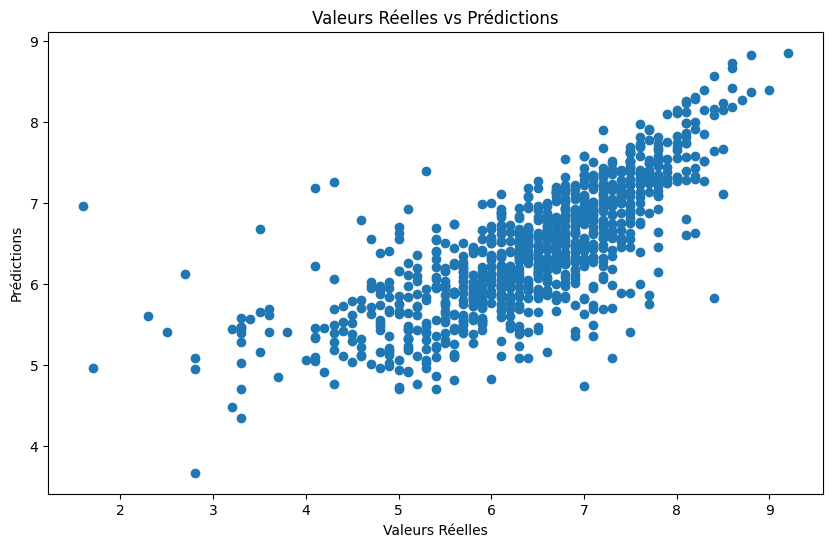

In [60]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Valeurs Réelles vs Prédictions')
plt.show()


Analyser les Résidus
Les résidus (la différence entre les valeurs réelles et prédites) peuvent donner des informations sur la performance du modèle.

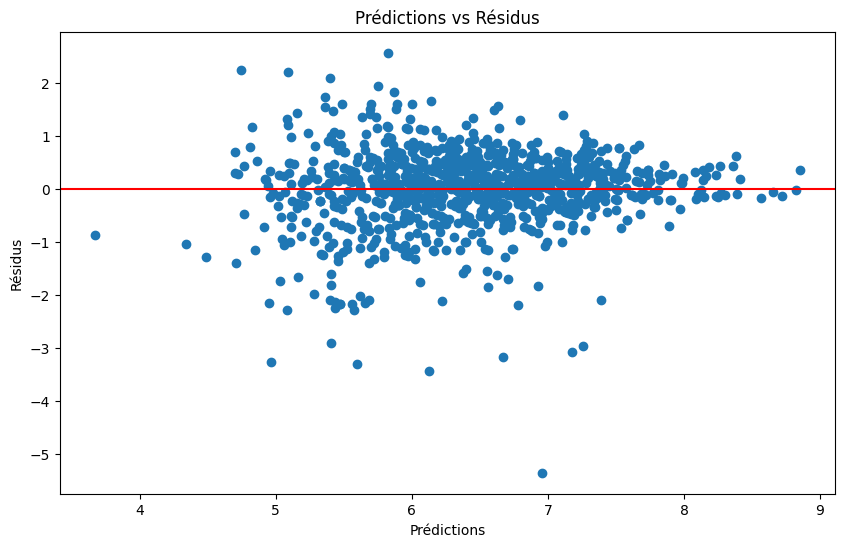

In [61]:
# Calcul des résidus
residus = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residus)
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Prédictions vs Résidus')
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


Évaluer la Distribution des Erreurs
Vérifiez la distribution des erreurs (résidus) pour voir si elles sont normalement distribuées, ce qui est une bonne indication que le modèle fonctionne bien

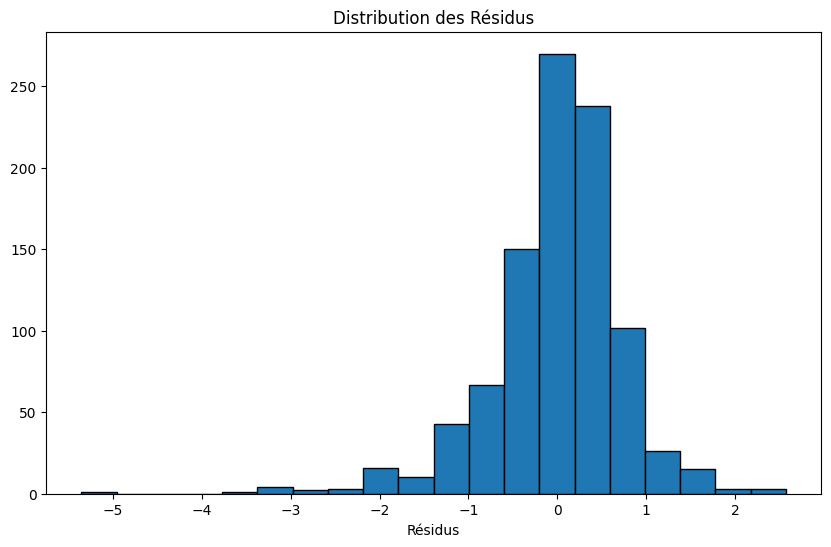

In [62]:
plt.figure(figsize=(10, 6))
plt.hist(residus, bins=20, edgecolor='black')
plt.xlabel('Résidus')
plt.title('Distribution des Résidus')
plt.show()


In [63]:
df_predictions.describe()


,Réel,Prédit
count,954.000000,954.000000
mean,6.406709,6.415294
std,1.120465,0.780923
min,1.600000,3.672222
25%,5.800000,5.864031
50%,6.500000,6.400321
75%,7.200000,6.957042
max,9.200000,8.849500
